<a href="https://colab.research.google.com/github/kaileykailey/Kailey-Zero-hunger/blob/main/Kailey_zero_hunger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question: How do poverty levels differ across the countries in this dataset?

In [78]:
from google.colab import files
uploaded = files.upload()

Saving OECD.WISE.RSB,DSD_SDG@DF_SDG_G_1,1.0+..1_2..._T._T._T._T._T..csv to OECD.WISE.RSB,DSD_SDG@DF_SDG_G_1,1.0+..1_2..._T._T._T._T._T. (1).csv


In [80]:
import pandas as pd

df = pd.read_csv('OECD.WISE.RSB,DSD_SDG@DF_SDG_G_1,1.0+..1_2..._T._T._T._T._T. (1).csv')
df.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,SDG_GOAL,SDG goal,SDG_TARGET,SDG target,...,SOURCE,Source,UNIT_MULT,Unit multiplier,PRICE_BASE,Price base,BASE_PER,Base period,DECIMALS,Decimals
0,DATAFLOW,OECD.WISE.RSB:DSD_SDG@DF_SDG_G_1(1.0),Sustainable Development Goal 01 - No poverty,I,BEL,Belgium,G_1,Goal 1. End poverty in all its forms everywhere,1_2,"1.2 By 2030, reduce at least by half the propo...",...,OECD,OECD,0,Units,NaN,NaN,NaN,NaN,1,One
1,DATAFLOW,OECD.WISE.RSB:DSD_SDG@DF_SDG_G_1(1.0),Sustainable Development Goal 01 - No poverty,I,CHL,Chile,G_1,Goal 1. End poverty in all its forms everywhere,1_2,"1.2 By 2030, reduce at least by half the propo...",...,OECD,OECD,0,Units,NaN,NaN,NaN,NaN,1,One
2,DATAFLOW,OECD.WISE.RSB:DSD_SDG@DF_SDG_G_1(1.0),Sustainable Development Goal 01 - No poverty,I,CRI,Costa Rica,G_1,Goal 1. End poverty in all its forms everywhere,1_2,"1.2 By 2030, reduce at least by half the propo...",...,OECD,OECD,0,Units,NaN,NaN,NaN,NaN,1,One
3,DATAFLOW,OECD.WISE.RSB:DSD_SDG@DF_SDG_G_1(1.0),Sustainable Development Goal 01 - No poverty,I,CRI,Costa Rica,G_1,Goal 1. End poverty in all its forms everywhere,1_2,"1.2 By 2030, reduce at least by half the propo...",...,OECD,OECD,0,Units,NaN,NaN,NaN,NaN,1,One
4,DATAFLOW,OECD.WISE.RSB:DSD_SDG@DF_SDG_G_1(1.0),Sustainable Development Goal 01 - No poverty,I,CZE,Czechia,G_1,Goal 1. End poverty in all its forms everywhere,1_2,"1.2 By 2030, reduce at least by half the propo...",...,OECD,OECD,0,Units,NaN,NaN,NaN,NaN,1,One


 I used a dataset from the OECD that contains information about the Sustainable Development Goal of 'No Poverty'. The dataset includes a 'poverty score' for a number of different countries over several years."

In [82]:
# Clean up column names (make lowercase and replace spaces with underscores)
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace(".", "", regex=False)

# Display cleaned column names
df.columns


Index(['structure', 'structure_id', 'structure_name', 'action', 'ref_area',
       'reference_area', 'sdg_goal', 'sdg_goal', 'sdg_target', 'sdg_target',
       'sdg_indicator', 'sdg_indicator', 'sdg_series', 'sdg_series', 'age',
       'age', 'sex', 'sex', 'income_wealth_quantile',
       'income_or_wealth_quantile', 'education_lev', 'education_level',
       'deg_urb', 'degree_of_urbanisation', 'unit_measure', 'unit_of_measure',
       'time_period', 'time_period', 'obs_value', 'observation_value',
       'source', 'source', 'unit_mult', 'unit_multiplier', 'price_base',
       'price_base', 'base_per', 'base_period', 'decimals', 'decimals'],
      dtype='object')

In [83]:
# Check missing values
missing = df.isnull().sum().sort_values(ascending=False)

# Only show columns with missing data
missing[missing > 0]


,0
base_per,267
base_period,267
time_period,267
observation_value,267
price_base,267
price_base,267


In [85]:
# Clean up column names (make lowercase and replace spaces with underscores)
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Display cleaned column names
print("Cleaned column names:")
print(df.columns)

# Check for missing values
print("\n\nMissing values per column:")
print(df.isnull().sum())

Cleaned column names:
Index(['structure', 'structure_id', 'structure_name', 'action', 'ref_area',
       'reference_area', 'sdg_goal', 'sdg_goal', 'sdg_target', 'sdg_target',
       'sdg_indicator', 'sdg_indicator', 'sdg_series', 'sdg_series', 'age',
       'age', 'sex', 'sex', 'income_wealth_quantile',
       'income_or_wealth_quantile', 'education_lev', 'education_level',
       'deg_urb', 'degree_of_urbanisation', 'unit_measure', 'unit_of_measure',
       'time_period', 'time_period', 'obs_value', 'observation_value',
       'source', 'source', 'unit_mult', 'unit_multiplier', 'price_base',
       'price_base', 'base_per', 'base_period', 'decimals', 'decimals'],
      dtype='object')


Missing values per column:
structure                      0
structure_id                   0
structure_name                 0
action                         0
ref_area                       0
reference_area                 0
sdg_goal                       0
sdg_goal                       0
sdg_target  

In [87]:
# Keep only relevant columns
df_tidy = df[['reference_area', 'sdg_target', 'sdg_indicator', 'time_period', 'observation_value']].copy()

# Drop rows with missing values in 'observation_value' and 'time_period'
df_tidy = df_tidy.dropna(subset=['observation_value', 'time_period'])

# Preview the cleaned, tidy data
df_tidy.head()

,reference_area,sdg_target,sdg_target,sdg_indicator,sdg_indicator,time_period,time_period,observation_value


In [92]:
# Remove duplicate columns
df = df.loc[:,~df.columns.duplicated()]

df_tidy = df[['ref_area', 'reference_area', 'sdg_target', 'sdg_indicator', 'time_period', 'obs_value']].copy()

# Rename for easier use
df_tidy.columns = ['country_code', 'country', 'sdg_target', 'indicator', 'year', 'value']

# Drop rows with missing values
df_tidy.dropna(subset=['value', 'year'], inplace=True)

# Convert to correct data types
df_tidy['year'] = pd.to_numeric(df_tidy['year'], errors='coerce')
df_tidy['value'] = pd.to_numeric(df_tidy['value'], errors='coerce')

# Drop any remaining missing rows
df_tidy.dropna(inplace=True)

# Preview cleaned dataset
df_tidy.head()

,country_code,country,sdg_target,indicator,year,value
0,BEL,Belgium,1_2,C010201,2021,7.8
1,CHL,Chile,1_2,C010201,2022,16.3
2,CRI,Costa Rica,1_2,C010201,2022,21.0
3,CRI,Costa Rica,1_2,C010201,2020,20.5
4,CZE,Czechia,1_2,C010201,2021,6.4


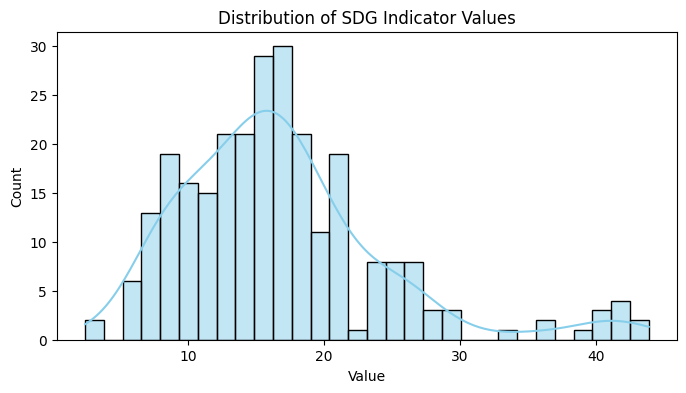

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of indicator values
plt.figure(figsize=(8, 4))
sns.histplot(df_tidy['value'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of SDG Indicator Values')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

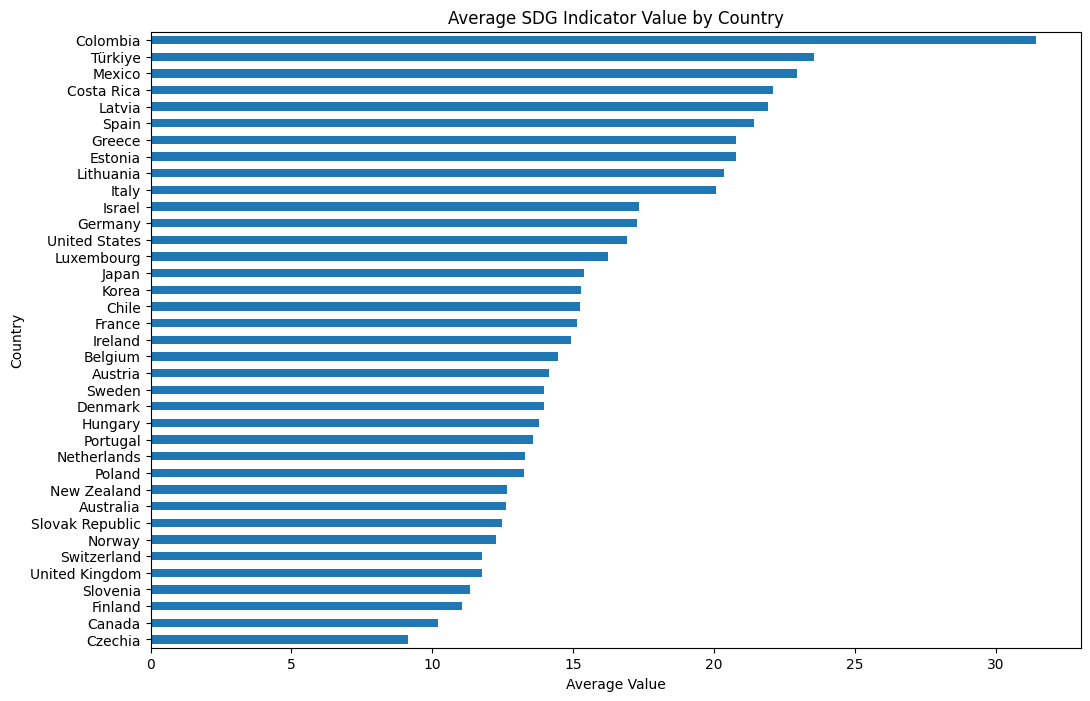

In [94]:
# Bar chart of average value by country
plt.figure(figsize=(12, 8))
df_tidy.groupby('country')['value'].mean().sort_values().plot(kind='barh')
plt.title('Average SDG Indicator Value by Country')
plt.xlabel('Average Value')
plt.ylabel('Country')
plt.show()

countries like Colombia and Costa Rica have some of the highest average scores, while countries like Czechia and Belgium have some of the lowest.This suggests that poverty is a much bigger challenge in some countries than in others."

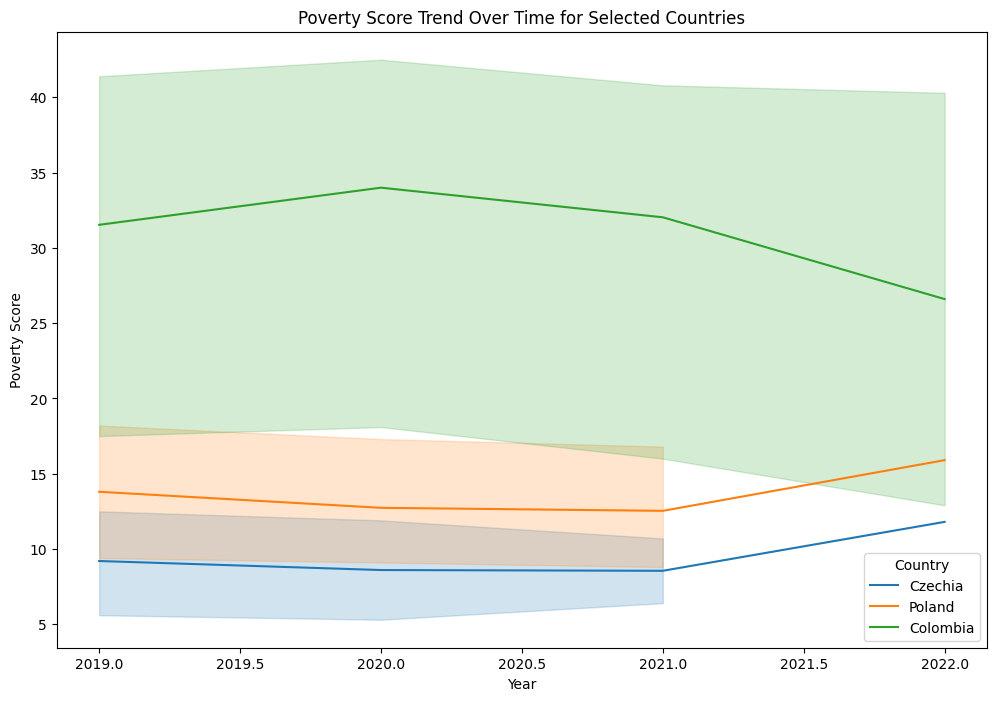

In [99]:
# Create a line chart to show the trend of poverty scores over time for selected countries
plt.figure(figsize=(12, 8))
selected_countries = ['Colombia', 'Poland', 'Czechia']
sns.lineplot(data=df_tidy[df_tidy['country'].isin(selected_countries)], x='year', y='value', hue='country')
plt.title('Poverty Score Trend Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Poverty Score')
plt.legend(title='Country')
plt.show()

The trend of the poverty score over time, revealed that even some of the countries with high average scores are making progress.
This is a hopeful sign, as it shows that even in countries with high levels of poverty, it is possible to make progress..

Insights from my Research: To better understand the reasons for these differences, I did some research on poverty in Colombia. I learned that Colombia has faced a number of challenges, including high levels of inequality, unable to get jobs, go to school, or even feel safe which made it difficult to reduce poverty. However, the government implemented a number of social programs that have helped to improve the lives of many people including cash support, food help, access to education, reducing violence, and creating more jobs.

Conclusion: In conclusion, this analysis has shown that poverty levels differ significantly across the countries in this dataset. While some countries have low levels of poverty, the data also shows that progress is possible, and that even countries with high levels of poverty can make significant strides in improving the lives of their citizens an decreasing poverty throughout time.